In [55]:
%matplotlib inline

import seaborn as sns
sns.set_color_codes()

In [106]:
run '../parsers/ENTSOE.py'

### Wind Price vs Production vs Consumption
Lets see how the market price of wind varies in relation to the wind production and consumption

In [108]:
now = arrow.utcnow()
start_date = now.replace(days=-7)
end_date = now.replace(hours=+24)

prices = fetch_price('ES', start_date, end_date)

production = fetch_production('ES', start_date, end_date)

consumption = fetch_consumption('ES', start_date, end_date)


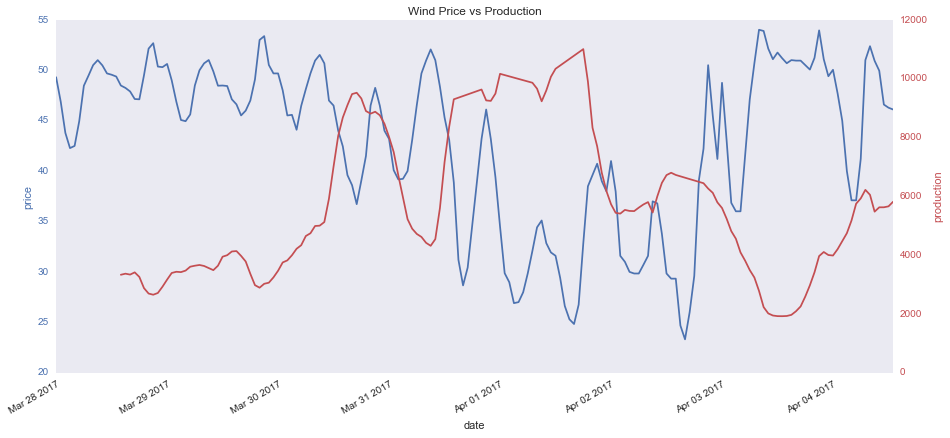

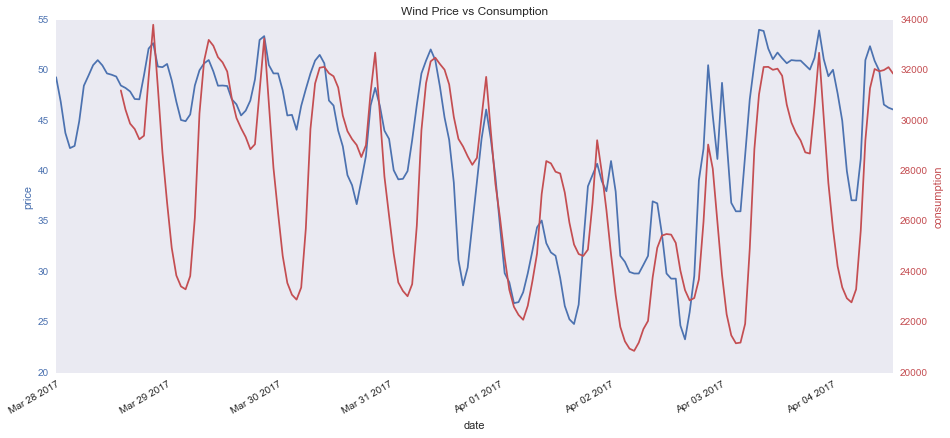

In [123]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(prices['timestamp'], prices['price'], 'b-')
ax1.set_xlabel('date')
ax1.set_ylabel('price', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(production['timestamp'], production['prod.wind'], 'r-')
ax2.set_ylabel('production', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(False)

fig.autofmt_xdate()
plt.title("Wind Price vs Production")
plt.gcf().set_size_inches(15, 7)
plt.show()

fig, ax1 = plt.subplots()

ax1.plot(prices['timestamp'], prices['price'], 'b-')
ax1.set_xlabel('date')
ax1.set_ylabel('price', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(consumption['timestamp'], consumption['consumption'], 'r-')
ax2.set_ylabel('consumption', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(False)

fig.autofmt_xdate()
plt.title("Wind Price vs Consumption")
plt.gcf().set_size_inches(15, 7)
plt.show()

### Exchange Between Countries 
Negative net flow means energy was imported and postive net flow means energy was exported

In [117]:
now = arrow.utcnow()
start_date = now.replace(days=-2)
end_date = now.replace(hours=+24)

net_flows = fetch_exchange('FR', 'DE', start_date, end_date)
net_flows = net_flows.append(fetch_exchange('FR', 'ES', start_date, end_date))


In [122]:
net_flows.groupby('country_to').sum().sort_values('net_flow',ascending=False)

,net_flow
country_to,
FR,-110334.0
